In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train = pd.read_csv('pet_train.csv')
test = pd.read_csv('pet_test.csv')

In [54]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [55]:
train['length(m)'].value_counts()

0.08    216
0.60    213
0.44    210
0.30    209
0.85    208
       ... 
0.68    163
0.34    157
0.17    147
1.00    107
0.00     93
Name: length(m), Length: 101, dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [57]:
train['issue_date'] = pd.to_datetime(train['issue_date'])
train['listing_date'] = pd.to_datetime(train['listing_date'])

In [58]:
train['inbetween_time'] = (train['listing_date'] - train['issue_date'])

In [59]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,inbetween_time
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73 days 16:25:00
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862 days 17:47:00
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752 days 08:24:00
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755 days 18:30:00
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52 days 09:38:00


In [60]:
train['inbetween_time'] =train['inbetween_time']/ np.timedelta64(1,'D')

In [61]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,inbetween_time
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73.684028
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862.740972
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,752.350000
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755.770833
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52.401389


In [62]:
train.drop(['issue_date','listing_date'], axis = 1, inplace=True)

In [63]:
train.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,inbetween_time
0,ANSL_69903,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73.684028
1,ANSL_66892,1.0,White,0.72,14.19,13,9,0.0,2,1862.740972
2,ANSL_69750,NaN,Brown,0.15,40.90,15,4,2.0,4,752.350000
3,ANSL_71623,1.0,White,0.62,17.82,0,1,0.0,2,755.770833
4,ANSL_57969,2.0,Black,0.50,11.06,18,4,0.0,1,52.401389


In [64]:
train.isnull().sum()

pet_id               0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
inbetween_time       0
dtype: int64

In [65]:
train['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [66]:
from sklearn.impute import KNNImputer 
train_1 = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_1['condition'] = knn_imputer.fit_transform(train_1[['condition']])

In [67]:
#train['condition'].fillna(1,inplace=True)

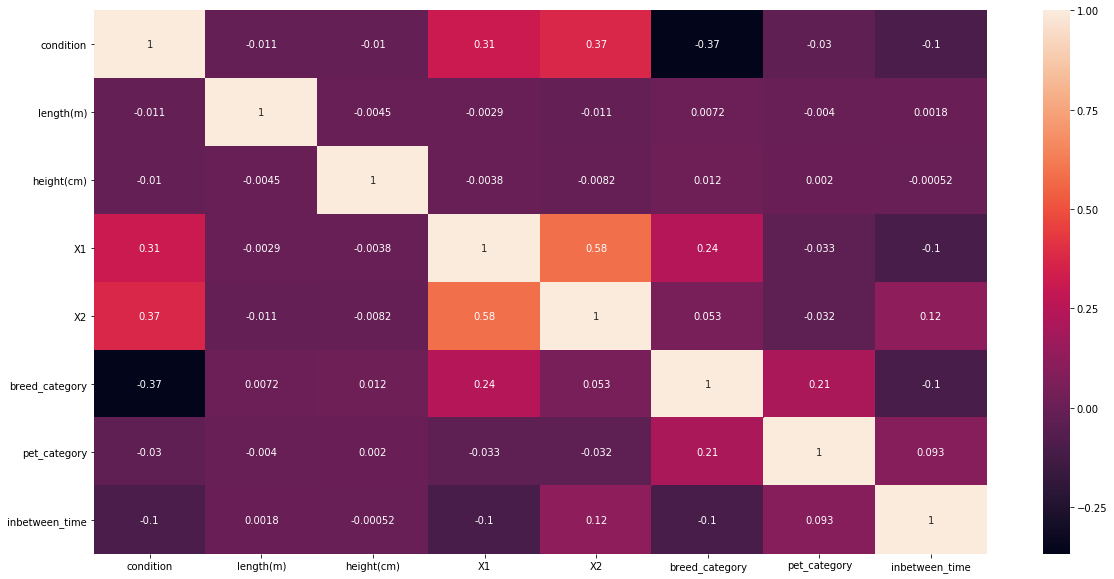

In [68]:
plt.figure(figsize = (20, 10))
sns.heatmap(train_1.corr(), annot = True)
plt.show()

In [69]:
train['color_type'].value_counts()

Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Brown Merle            39
Orange                 39
Black Smoke            32
Gold                   31
Tortie Point           26
Silver                 24
Red Tick               23
Blue Tick              21
Blue Point             20
Lilac Point 

In [70]:
train_1['length(m)'].mask(train_1['length(m)'] == 0, 0.08, inplace=True)

In [71]:
#train_1['length(m)'] = train_1['length(m)'].map({'0': 0.502})

In [72]:
test['issue_date'] = pd.to_datetime(test['issue_date'])
test['listing_date'] = pd.to_datetime(test['listing_date'])

In [73]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [74]:
test['inbetween_time'] = (test['listing_date'] - test['issue_date'])

In [75]:
test['inbetween_time'] =test['inbetween_time']/ np.timedelta64(1,'D')

In [76]:
test.drop(['issue_date','listing_date'], axis = 1, inplace=True)

In [77]:
test['condition'].value_counts()

1.0    2928
0.0    2685
2.0    1840
Name: condition, dtype: int64

In [78]:
from sklearn.impute import KNNImputer 
test_1 = test.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
test_1['condition'] = knn_imputer.fit_transform(test_1[['condition']])

In [79]:
test_1.isnull().sum()

pet_id            0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
inbetween_time    0
dtype: int64

In [80]:
test_1['length(m)'].value_counts()

0.99    114
0.75     98
0.45     97
0.95     96
0.27     95
       ... 
0.43     64
0.25     61
0.26     61
0.00     44
1.00     35
Name: length(m), Length: 101, dtype: int64

In [81]:
test_1['length(m)'].mask(test_1['length(m)'] == 0, 0.99, inplace=True)

In [82]:
#test['condition'].fillna(1,inplace=True)

In [83]:
cat_col = ['color_type']


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in cat_col:
    train_1[col] = encoder.fit_transform(train_1[col])
    test_1[col] = encoder.transform(test_1[col])

In [85]:
train_1.drop('pet_id',axis=1,inplace=True)
test_1.drop('pet_id',axis=1,inplace=True)

In [86]:
train_1['length1'] = train_1['length(m)']*100

In [87]:
test_1['length1'] = test_1['length(m)']*100

In [88]:
train_1.drop('length(m)',axis=1,inplace=True)
test_1.drop('length(m)',axis=1,inplace=True)

In [89]:
train_1.head()

,condition,color_type,height(cm),X1,X2,breed_category,pet_category,inbetween_time,length1
0,2.00000,18,7.78,13,9,0.0,1,73.684028,80.0
1,1.00000,53,14.19,13,9,0.0,2,1862.740972,72.0
2,0.88339,15,40.90,15,4,2.0,4,752.350000,15.0
3,1.00000,53,17.82,0,1,0.0,2,755.770833,62.0
4,2.00000,2,11.06,18,4,0.0,1,52.401389,50.0


In [90]:
from sklearn.model_selection import train_test_split
X = train_1.drop(['breed_category','pet_category'],axis=1)
y= train_1['pet_category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [91]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
RFC_d = RandomForestClassifier()
RFC_d.fit(X_train,y_train)
pred_ref = RFC_d.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred_ref))
print('f1_score :',f1_score(y_test,pred_ref,average='weighted'))

accuracy_score : 0.8736462093862816
f1_score : 0.8721229200431188


In [92]:
import xgboost
clf = xgboost.XGBClassifier()

In [93]:
clf.fit(X_train,y_train)
pred_xgd = clf.predict(X_test)

print('accuracy_score :',accuracy_score(y_test,pred_xgd))
print('f1_score :',f1_score(y_test,pred_xgd,average='weighted'))

accuracy_score : 0.8950944998938204
f1_score : 0.8936660271311033


In [94]:
from sklearn.model_selection import KFold
kf  = KFold(n_splits=10)
scores = []
pred_test = []
model = xgboost.XGBClassifier()
i=1
for train_1_index ,test_1_index in kf.split(X):
    #print('Train index:',train_index,'Cross_validation index:',test_index)
    X_train_cv = X.iloc[train_1_index]
    X_test_cv = X.iloc[test_1_index]
    
    y_train_cv = y.iloc[train_1_index]
    y_test_cv = y.iloc[test_1_index]
    
    model.fit(X_train_cv,y_train_cv)
    
    pred = model.predict(X_test_cv)
    
    print('validation data f1_score after {} split'.format(i),f1_score(y_test_cv,pred,average='weighted'))
    i +=1
    scores.append(f1_score(y_test_cv,pred,average='weighted'))
    
    test_predictions = model.predict(test_1)
    pred_test.append(test_predictions)

validation data f1_score after 1 split 0.8947075055007226
validation data f1_score after 2 split 0.9039818971608422
validation data f1_score after 3 split 0.8901572567542687
validation data f1_score after 4 split 0.9137169887446471
validation data f1_score after 5 split 0.9031029364610513
validation data f1_score after 6 split 0.8967625990629295
validation data f1_score after 7 split 0.8952120411990909
validation data f1_score after 8 split 0.8984777178252455
validation data f1_score after 9 split 0.8976017129373343
validation data f1_score after 10 split 0.8947408482502055


In [95]:
## making combining of  of all the models out put 
from scipy.stats import mode
pred1 = mode(pred_test,0)

In [96]:
test = pd.read_csv('pet_test.csv')

In [97]:
ID1 = test['pet_id']

In [98]:
dataframe1 = pd.DataFrame({'pet_id':ID1,'pet_category':pred1.mode[0]})
#dataframe.to_csv('custom1.csv',index=False)

In [99]:
dataframe1.head()

,pet_id,pet_category
0,ANSL_75005,2
1,ANSL_76663,1
2,ANSL_58259,2
3,ANSL_67171,2
4,ANSL_72871,2


In [100]:
dataframe1.to_csv('petty2.csv',index=False)

In [101]:
df1 = pd.read_csv('petty1.csv')
df2 = pd.read_csv('petty2.csv')

In [102]:
df1.head()

,pet_id,breed_category
0,ANSL_75005,1.0
1,ANSL_76663,0.0
2,ANSL_58259,0.0
3,ANSL_67171,0.0
4,ANSL_72871,0.0


In [103]:
df2.head()

,pet_id,pet_category
0,ANSL_75005,2
1,ANSL_76663,1
2,ANSL_58259,2
3,ANSL_67171,2
4,ANSL_72871,2


In [104]:
list1 = df2['pet_category']

In [105]:
 df1['pet_category'] = list1

In [106]:
df1.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2


In [107]:
df1.to_csv('petty_tuesday.csv',index=False)